In [1]:
import numpy as np
print(f"numpy version: {np.__version__}")
import pandas as pd
print(f"pandas version: {pd.__version__}")
import matplotlib.pyplot as plt

numpy version: 1.22.3
pandas version: 1.4.2


In [3]:
df = pd.read_csv('bestsellers_with_categories.csv')
df.head(5)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [4]:
print(df.shape)

(550, 7)


Q&A: How many book records are in the dataset? - 550 books (the number of the rows in the table)

In [5]:
# change columns names
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

In [6]:
df

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


### Preanalysis

In [7]:
print(df.dtypes)

name            object
author          object
user_rating    float64
reviews          int64
price            int64
year             int64
genre           object
dtype: object


In [9]:
# check if there are nan or empty records in the df
df.isnull().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

Q&A: Are there any empty records in the df? - No

In [10]:
# check the unique values of the column genre
df['genre'].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

Q&A: List the genre unique names/values? - Non Fiction and Fiction


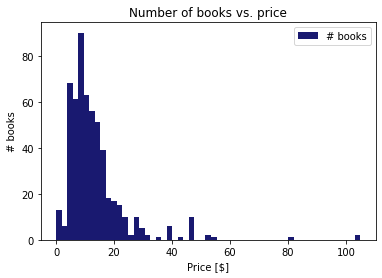

In [27]:
# check the pricing
df['price'].plot(kind='hist', label='# books', color='midnightblue', bins=55)
plt.xlabel('Price [$]')
plt.ylabel('# books')
plt.title('Number of books vs. price')
plt.legend()
plt.show()

In [17]:
# get the max, min, mean, median book price
df['price'].describe()

count    550.000000
mean      13.100000
std       10.842262
min        0.000000
25%        7.000000
50%       11.000000
75%       16.000000
max      105.000000
Name: price, dtype: float64

In [29]:
print(f"Q&A: Max value of the books price is {df['price'].max()}")
print(f"Q&A: Min value of the books price is {df['price'].min()}")
print(f"Q&A: Mean value of the books price is {df['price'].mean()}")
print(f"Q&A: Median of the books price is {df['price'].median()}")

Q&A: Max value of the books price is 105
Q&A: Min value of the books price is 0
Q&A: Mean value of the books price is 13.1
Q&A: Median of the books price is 11.0


### Data searching/sorting


In [31]:
# get the max value of the user_rating column
df.user_rating.max()

4.9

Q&A: the max user rating of the book is 4.9

In [32]:
# Q&A: how many books have rating = 4.9 - 28 books
df[df['user_rating']==df.user_rating.max()]['name'].drop_duplicates().count()

28

In [39]:
# Q&A: which book has the max number of reviews - Where the Crawdads Sing
df[df.reviews==df.reviews.max()][['name', 'author', 'reviews']]

,name,author,reviews
534,Where the Crawdads Sing,Delia Owens,87841


In [41]:
# Q&A: get the most expensive book from the year 2015 - Publication Manual of the American Psychologic..
# get the max book price in 2015
max_price_2015 = df[df.year==2015]['price'].max()
df[(df.year == 2015) & 
   (df.price == max_price_2015)
  ][['name', 'author', 'price']]

,name,author,price
277,Publication Manual of the American Psychologic...,American Psychological Association,46


In [43]:
# Q&A: how many Fiction books were in the top-50 in 2012 - 20 books
df[(df.genre == 'Fiction') &
  (df.year == 2010)]["name"].count()

20

In [47]:
# Q&A: how many books with user_rating 4.9 were in range 2010 - 2011? - 1 book
df[(df.user_rating == 4.9) &
   (df.year.isin([2010, 2011]))
    ]

,name,author,user_rating,reviews,price,year,genre
187,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2011,Non Fiction


In [57]:
# sort books from 2015 if the price is < 8 $
df_sort_2015_price_less_8 = df[(df.year == 2015) &
   (df.price < 8)].sort_values(by = 'price')
df_sort_2015_price_less_8


,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134,5,2015,Non Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235,5,2015,Non Fiction


In [56]:
# Q&A: the most expensive book in the sort df is:")
df_sort_2015_price_less_8[-1:]

,name,author,user_rating,reviews,price,year,genre
253,Old School (Diary of a Wimpy Kid #10),Jeff Kinney,4.8,6169,7,2015,Fiction


### Data aggregation and manipulations with tables 

In [59]:
# get the max and min price for each of the genre
df_price_genre = df.groupby(['genre'])[['price']].agg([np.min, np.max])
df_price_genre

price     
             amin amax
genre                 
Fiction         0   82
Non Fiction     0  105

In [87]:
max_fiction = df_price_genre[df_price_genre.index == "Fiction"]['price']['amax'].iloc[0]
min_fiction = df_price_genre[df_price_genre.index == "Fiction"]['price']['amin'].iloc[0]
max_non_fiction = df_price_genre[df_price_genre.index == "Non Fiction"]['price']['amax'].iloc[0]
min_non_fiction = df_price_genre[df_price_genre.index == "Non Fiction"]['price']['amin'].iloc[0]

In [89]:
print(f"Q&A: Max price of the books for genre Fiction is {max_fiction} $")
print(f"Q&A: Min price of the books for genre Fiction is {min_fiction} $")
print(f"Q&A: Max price of the books for genre Non Fiction is {max_non_fiction} $")
print(f"Q&A: Min price of the books for genre Non Fiction is {min_non_fiction} $")

Q&A: Max price of the books for genre Fiction is 82 $
Q&A: Min price of the books for genre Fiction is 0 $
Q&A: Max price of the books for genre Non Fiction is 105 $
Q&A: Min price of the books for genre Non Fiction is 0 $


In [116]:
# create new df with records of # of books per author 
s_author_books= df.groupby(['author'])['author'].count()
s_author_books

author
Abraham Verghese              2
Adam Gasiewski                1
Adam Mansbach                 1
Adir Levy                     1
Admiral William H. McRaven    1
                             ..
Walter Isaacson               3
William Davis                 2
William P. Young              2
Wizards RPG Team              3
Zhi Gang Sha                  2
Name: author, Length: 248, dtype: int64

In [117]:
type(s_author_books)

pandas.core.series.Series

In [143]:
# using series.to_frame to
# convert series to dataframe
df_author_books = s_author_books.to_frame(name="books_number").reset_index()
df_author_books

,author,books_number
0,Abraham Verghese,2
1,Adam Gasiewski,1
2,Adam Mansbach,1
3,Adir Levy,1
4,Admiral William H. McRaven,1
...,...,...
243,Walter Isaacson,3
244,William Davis,2
245,William P. Young,2
246,Wizards RPG Team,3


In [119]:
# Q&A: what is the shape of the df? -  248 rows × 2 columns
print(df_author_books.shape)

(248, 2)


In [136]:
# Q&A: which author has the max number of books? - Jeff Kinney
df_author_books[df_author_books['books_number']==df_author_books['books_number'].max()]

,author,books_number
120,Jeff Kinney,12


In [141]:
max_books_author = df_author_books[df_author_books['books_number']==df_author_books['books_number'].max()]["author"].iloc[0]
print(f"Q&A: Author with the max number of books is {max_books_author}")

number_of_books_author = df_author_books[df_author_books['books_number']==df_author_books['books_number'].max()]["books_number"].iloc[0]
print(f"Q&A: Author {max_books_author} has {number_of_books_author} books")


Q&A: Author with the max number of books is Jeff Kinney
Q&A: Author Jeff Kinney has 12 books


In [142]:
# create df with mean value of user_rating for each author
s_author_rating= df.groupby(['author'])['user_rating'].mean()
s_author_rating

author
Abraham Verghese              4.600000
Adam Gasiewski                4.400000
Adam Mansbach                 4.800000
Adir Levy                     4.800000
Admiral William H. McRaven    4.700000
                                ...   
Walter Isaacson               4.566667
William Davis                 4.400000
William P. Young              4.600000
Wizards RPG Team              4.800000
Zhi Gang Sha                  4.600000
Name: user_rating, Length: 248, dtype: float64

In [145]:
# using series.to_frame to
# convert series to dataframe
df_author_rating = s_author_rating.to_frame(name="mean_rating").reset_index()
df_author_rating

,author,mean_rating
0,Abraham Verghese,4.600000
1,Adam Gasiewski,4.400000
2,Adam Mansbach,4.800000
3,Adir Levy,4.800000
4,Admiral William H. McRaven,4.700000
...,...,...
243,Walter Isaacson,4.566667
244,William Davis,4.400000
245,William P. Young,4.600000
246,Wizards RPG Team,4.800000


In [156]:
df_author_rating[df_author_rating['mean_rating']==df_author_rating['mean_rating'].min()]

,author,mean_rating
71,Donna Tartt,3.9


In [153]:
# Q&A: Author with min mean_rating  - 'Donna Tartt'
df_author_rating[df_author_rating['mean_rating']==df_author_rating['mean_rating'].min()]["author"].iloc[0]
# df_author_rating[df_author_rating['mean_rating']==df_author_rating['mean_rating'].min()]

'Donna Tartt'

In [155]:
# Q&A: The mean_rating of the author with min mean_rating is - 3.9
df_author_rating[df_author_rating['mean_rating']==df_author_rating['mean_rating'].min()]["mean_rating"].iloc[0]

3.9

In [164]:
# merge two df by author 
df_author_books_and_rating=pd.concat([df_author_books, df_author_rating], axis=1)
df_author_books_and_rating

,author,books_number,author,mean_rating
0,Abraham Verghese,2,Abraham Verghese,4.600000
1,Adam Gasiewski,1,Adam Gasiewski,4.400000
2,Adam Mansbach,1,Adam Mansbach,4.800000
3,Adir Levy,1,Adir Levy,4.800000
4,Admiral William H. McRaven,1,Admiral William H. McRaven,4.700000
...,...,...,...,...
243,Walter Isaacson,3,Walter Isaacson,4.566667
244,William Davis,2,William Davis,4.400000
245,William P. Young,2,William P. Young,4.600000
246,Wizards RPG Team,3,Wizards RPG Team,4.800000


In [165]:
df_author_books_and_rating = df_author_books_and_rating.loc[:,~df_author_books_and_rating.columns.duplicated()]
df_author_books_and_rating

,author,books_number,mean_rating
0,Abraham Verghese,2,4.600000
1,Adam Gasiewski,1,4.400000
2,Adam Mansbach,1,4.800000
3,Adir Levy,1,4.800000
4,Admiral William H. McRaven,1,4.700000
...,...,...,...
243,Walter Isaacson,3,4.566667
244,William Davis,2,4.400000
245,William P. Young,2,4.600000
246,Wizards RPG Team,3,4.800000


In [166]:
# sort df_author_books_and_rating by books_number and mean_rating
df_author_books_and_rating.sort_values(by=['books_number', 'mean_rating'], ascending=[True, True])

,author,books_number,mean_rating
171,Muriel Barbery,1,4.000000
43,Chris Cleave,1,4.100000
109,Ian K. Smith M.D.,1,4.100000
186,Pierre Dukan,1,4.100000
81,Elizabeth Strout,1,4.200000
...,...,...,...
11,American Psychological Association,10,4.500000
226,Suzanne Collins,11,4.663636
92,Gary Chapman,11,4.736364
197,Rick Riordan,11,4.772727


In [167]:
# Q&A: which author id the first in the df - 'Muriel Barbery'

df_author_books_and_rating.sort_values(by=['books_number', 'mean_rating'], ascending=[True, True])["author"].iloc[0]

'Muriel Barbery'